In [4]:
! pip install mglearn
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 27.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2152367d7bae1073d253fbf4b9b029dc00149e1fd5daef32d24e571e11a38f40
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


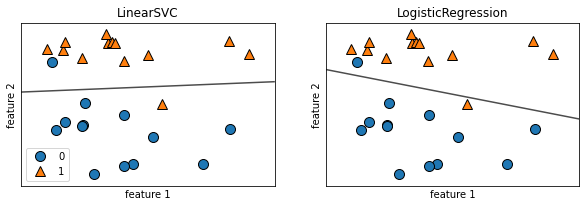

In [5]:
# 로지스틱 회귀, SVM library 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# dataset 로드
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, 
                                  eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("feature 1")
  ax.set_ylabel("feature 2")
axes[0].legend()

In [6]:
# Decison Tree Classifier 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
#훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
#학습
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
#결과
print("train set: {:.3f}".format(tree.score(X_train, y_train)))
print("test set: {:.3f}".format(tree.score(X_test, y_test)))

train set: 0.988
test set: 0.951


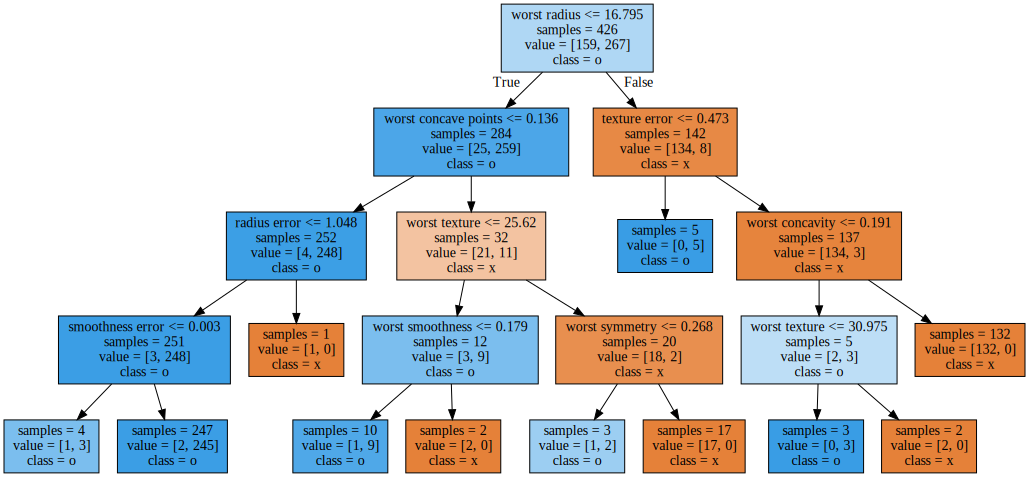

In [7]:
# 트리 모듈의 exprot_graphvis 함수를 이용해 트리 시각화 가능
# filled 매개변수를 true 지정하면 노드의 클래스가 구분되도록 색칠
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot",class_names = ["x","o"],
                feature_names = cancer.feature_names, impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [8]:
#특성 중요도 확인
print("feature importance: \n",tree.feature_importances_)

feature importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


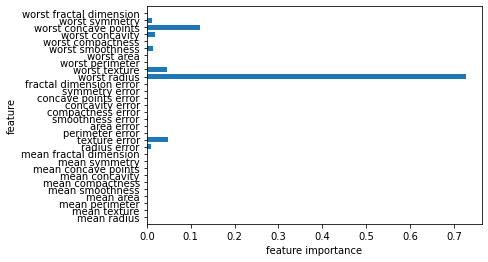

In [9]:
# 특성 중요로 활성화
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_,align = 'center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

Text(0, 0.5, 'price ($/Mbyte)')

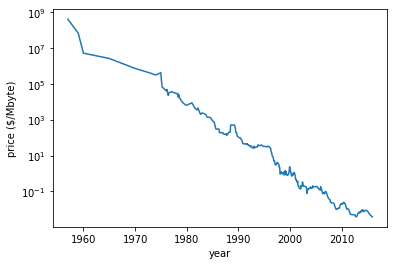

In [10]:
import os
ram_price = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
# y축 로그스케일로 출력
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전 훈련 데이터. 2000년 이후 테스트 데이터
data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]
# 날짜의 특성만 선택
X_train = data_train.date[:,np.newaxis]
# 데이터와 타깃 사이 관계를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)
# 학습 모델 생성 : 회귀 결정 트리, 선형 모델 둘 다 fit
tree = DecisionTreeRegressor().fit(X_train,y_train)
Linear_reg = LinearRegression().fit(X_train,y_train)
# 예측 : 전체기간은 predict
X_all = ram_price.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_linear_reg = Linear_reg.predict(X_all)
# 예측값을 로그 스케일로 
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_linear_reg)
# plt.semilogy(data_train.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


In [12]:
# random forest classifier import
# split / tree number / fit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify = y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)

forest.fit(X_train, y_train)

# x = forest.predict(X_train)
#y = forest.predict(y_train)

# plt.plot(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

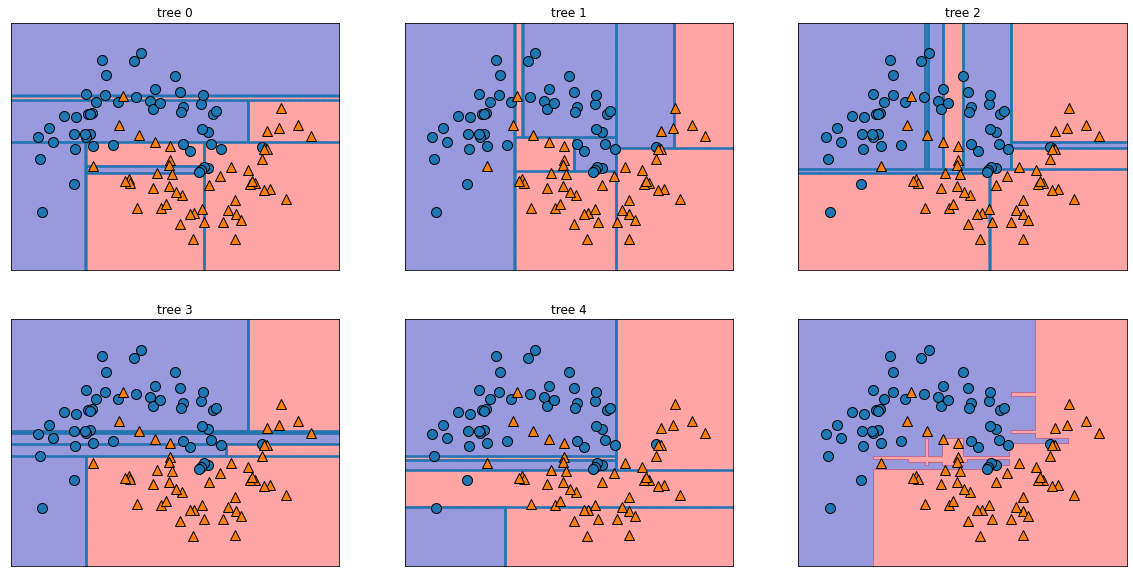

In [13]:
fig, axes=  plt.subplots(2,3, figsize = (20, 10))

# 반복해서 각 트리의 결과를 도출
for _, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("tree {}".format(_))
  mglearn.plots.plot_tree_partition(X ,y, tree, ax = ax)

# 도출 한 5가지의 결과를 기반으로 추출한 최종 결과 값.
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax = axes[-1,-1],alpha = .4)
mglearn.discrete_scatter(X[:,0],X[:,1], y)